In [120]:
from bs4 import BeautifulSoup # biblioteca para análisis y extracción de datos de archivos HTML y XML.
import requests
import pandas as pd

In [121]:
url = 'https://www.ocasionplus.com/coches-segunda-mano?v2&orderBy=morePopular'

In [122]:
result_coches = requests.get(url)

if result_coches.status_code == 200:
    print(result_coches.status_code)
else:
    print(f'Ha habido un error de tipo: {result_coches.status_code}')

200


<!DOCTYPE html>
<html lang="es">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <link as="image" fetchpriority="high" href="https://images.grupoocasionplus.com/VSkVZTyUvVKY-Nay6RvHm756YlBs0O-FzMOJpZryX4c/mobilex2a/aHR0cHM6Ly9vY2FzaW9ucGx1cy5lc3RhdGljb3NtZi5jb20vZm90b3NfYW51bmNpb3MvMDAvMDYvNDUvMDIvMzMvNC94MDEuanBnP21kNT1jMzRjNjNiNWFlYmM3Yjk0NjBhZDgzYmE3OTkyNTk2Nw" rel="preload"/>
  <link data-precedence="next" href="/hera/_next/static/css/947b97ffbe7f670e.css" rel="stylesheet"/>
  <link data-precedence="next" href="/hera/_next/static/css/51c286ae0cbd7c1d.css" rel="stylesheet"/>
  <link data-precedence="next" href="/hera/_next/static/css/2037a48a6aaa070d.css" rel="stylesheet"/>
  <link data-precedence="next" href="/hera/_next/static/css/25bbbb8e9032ce3e.css" rel="stylesheet"/>
  <link data-precedence="next" href="/hera/_next/static/css/68d08846844ac6d5.css" rel="stylesheet"/>
  <link data-precedence="next" href="/hera/_next/sta
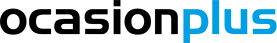

In [123]:
soup_coches = BeautifulSoup(result_coches.content, 'html.parser')
print(soup_coches.prettify())

In [124]:
# obtener nombres de los coches

lista_auto = soup_coches.find_all('span', {'data-test': 'span-brand-model'}) 
lista_auto

autos = []

for i in lista_auto:
    autos.append(i.getText())

autos

['Volvo V90 Cross Country',
 'Nissan QASHQAI',
 'BMW Serie 1',
 'Opel Corsa',
 'Toyota Aygo',
 'Fiat 500',
 'Citroën C3 Aircross',
 'Toyota C-HR',
 'DFSK 580',
 'Peugeot 508',
 'Skoda Fabia',
 'Toyota C-HR',
 'Peugeot 5008',
 'Ford Focus',
 'Opel Corsa',
 'Hyundai Tucson',
 'Hyundai Tucson',
 'Citroën C3 Aircross',
 'Infiniti Q50',
 'Hyundai Kona']

In [125]:
#obtener los km recorridos

lista_km = soup_coches.find_all('span', {'data-test': 'span-km'}) 
lista_km

km = []

for i in lista_km:
    km.append(i.getText())

km

['102.217 Km',
 '105.002 Km',
 '124.543 Km',
 '81.260 Km',
 '50.781 Km',
 '135.940 Km',
 '38.267 Km',
 '77.966 Km',
 '33.856 Km',
 '156.163 Km',
 '93.369 Km',
 '5.658 Km',
 '63.487 Km',
 '167.920 Km',
 '134.589 Km',
 '47.630 Km',
 '32.388 Km',
 '92.788 Km',
 '138.188 Km',
 '51.882 Km']

In [126]:
#obtener el precio con descuento/final

lista_precio_rebaj = soup_coches.find_all('span', {'data-test': 'span-finance'})
lista_precio_rebaj


precio_rebaj = []

for i in lista_precio_rebaj:
    precio_rebaj.append(i.getText())

precio_rebaj

['36.273€',
 '16.637€',
 '17.182€',
 '7.290€',
 '11.955€',
 '5.200€',
 '14.537€',
 '22.137€',
 '23.455€',
 '10.990€',
 '8.628€',
 '26.591€',
 '18.446€',
 '3.190€',
 '9.073€',
 '19.537€',
 '20.264€',
 '11.728€',
 '15.700€',
 '18.991€']

In [128]:
lista_precio_orig_con_nulos= soup_coches.find_all('span', {'class': 'cardVehicle_spot__e6YZx'})

lista_precio_orig_con_nulos



[<span class="cardVehicle_spot__e6YZx" data-test="span-brand-model">Volvo V90 Cross Country</span>,
 <span class="cardVehicle_spot__e6YZx" data-test="span-price">39.900€</span>,
 <span class="cardVehicle_spot__e6YZx" data-test="span-brand-model">Nissan QASHQAI</span>,
 <span class="cardVehicle_spot__e6YZx" data-test="span-price">18.300€</span>,
 <span class="cardVehicle_spot__e6YZx" data-test="span-brand-model">BMW Serie 1</span>,
 <span class="cardVehicle_spot__e6YZx" data-test="span-price">18.900€</span>,
 <span class="cardVehicle_spot__e6YZx" data-test="span-brand-model">Opel Corsa</span>,
 <span class="cardVehicle_spot__e6YZx" data-test="span-brand-model">Toyota Aygo</span>,
 <span class="cardVehicle_spot__e6YZx" data-test="span-price">13.150€</span>,
 <span class="cardVehicle_spot__e6YZx" data-test="span-brand-model">Fiat 500</span>,
 <span class="cardVehicle_spot__e6YZx" data-test="span-brand-model">Citroën C3 Aircross</span>,
 <span class="cardVehicle_spot__e6YZx" data-test="spa

In [145]:
prices = []  # Initialize an empty list to store the prices
for i in range(len(lista_precio_orig_con_nulos)):
    element = lista_precio_orig_con_nulos[i]
    if element.attrs.get("data-test") == "span-brand-model":
        # Check the next element for a price
        if i + 1 < len(lista_precio_orig_con_nulos) and lista_precio_orig_con_nulos[i + 1].attrs.get("data-test") == "span-price":
            prices.append(lista_precio_orig_con_nulos[i + 1].get_text(strip=True))
        else:
            # No price found, append "Sin Datos"
            prices.append("Sin Datos")


In [146]:
prices

['39.900€',
 '18.300€',
 '18.900€',
 'Sin Datos',
 '13.150€',
 'Sin Datos',
 '15.990€',
 '24.350€',
 '25.800€',
 'Sin Datos',
 '9.490€',
 '29.250€',
 '20.290€',
 'Sin Datos',
 '9.980€',
 '21.490€',
 '22.290€',
 '12.900€',
 'Sin Datos',
 '20.890€']

In [147]:
len(prices)

20

In [149]:
coches_diccionario = {}
coches_diccionario['coche']= autos
coches_diccionario['precio_rebajado']= precio_rebaj
coches_diccionario['precio_original']= prices
coches_diccionario['km_recorrido']= km
coches_diccionario

{'coche': ['Volvo V90 Cross Country',
  'Nissan QASHQAI',
  'BMW Serie 1',
  'Opel Corsa',
  'Toyota Aygo',
  'Fiat 500',
  'Citroën C3 Aircross',
  'Toyota C-HR',
  'DFSK 580',
  'Peugeot 508',
  'Skoda Fabia',
  'Toyota C-HR',
  'Peugeot 5008',
  'Ford Focus',
  'Opel Corsa',
  'Hyundai Tucson',
  'Hyundai Tucson',
  'Citroën C3 Aircross',
  'Infiniti Q50',
  'Hyundai Kona'],
 'precio_rebajado': ['36.273€',
  '16.637€',
  '17.182€',
  '7.290€',
  '11.955€',
  '5.200€',
  '14.537€',
  '22.137€',
  '23.455€',
  '10.990€',
  '8.628€',
  '26.591€',
  '18.446€',
  '3.190€',
  '9.073€',
  '19.537€',
  '20.264€',
  '11.728€',
  '15.700€',
  '18.991€'],
 'precio_original': ['39.900€',
  '18.300€',
  '18.900€',
  'Sin Datos',
  '13.150€',
  'Sin Datos',
  '15.990€',
  '24.350€',
  '25.800€',
  'Sin Datos',
  '9.490€',
  '29.250€',
  '20.290€',
  'Sin Datos',
  '9.980€',
  '21.490€',
  '22.290€',
  '12.900€',
  'Sin Datos',
  '20.890€'],
 'km_recorrido': ['102.217 Km',
  '105.002 Km',
  '124.5

In [150]:
df_coches_ocasion = pd.DataFrame(coches_diccionario)

In [151]:
df_coches_ocasion

,coche,precio_rebajado,precio_original,km_recorrido
0,Volvo V90 Cross Country,36.273€,39.900€,102.217 Km
1,Nissan QASHQAI,16.637€,18.300€,105.002 Km
2,BMW Serie 1,17.182€,18.900€,124.543 Km
3,Opel Corsa,7.290€,Sin Datos,81.260 Km
4,Toyota Aygo,11.955€,13.150€,50.781 Km
5,Fiat 500,5.200€,Sin Datos,135.940 Km
6,Citroën C3 Aircross,14.537€,15.990€,38.267 Km
7,Toyota C-HR,22.137€,24.350€,77.966 Km
8,DFSK 580,23.455€,25.800€,33.856 Km
9,Peugeot 508,10.990€,Sin Datos,156.163 Km
